<a href="https://colab.research.google.com/github/AlessioChen/Deeep_learning_class/blob/main/deep_learning_video_lectures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import tensorflow as tf
import torch


In [48]:
# List devices
tf.config.list_physical_devices()

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


# Video Lecture 1





## Tensors

>  Un tensore rappresenta un'applicazione multi lineare, cioè funzione di più variabili che è lineare a ciascuna variabile.



- È importante che tutti gli elementi del tensore abbiamo stessa forma.

- È caratterizzato da almeno 5 attributi:

  1. Valore
  2. Tipo
  3. Forma
  4. Rango
  5. Dispositivo



In [49]:
x = torch.tensor([[5,3,3], [1,5,8]])
print(x)
print(x.dtype)   # Tipo
print(x.shape)   # Forma
print(x.ndim)    # Rango
assert x.ndim == len(x.shape)
print(x.device)  # Dispositivo

tensor([[5, 3, 3],
        [1, 5, 8]])
torch.int64
torch.Size([2, 3])
2
cpu


In [50]:
y = torch.zeros((3,2,4)) # tensore nulla di forma 3 2 4 , 3 array di 2 righe e 4 colonne ciascuno
z = torch.ones((3,2,1 )) # tensore costante con tutti gli elementi uguale a 1
r = torch.rand((3,2,3 )) # tensore con valori casuali campionati da distribuzione normale in IID
print(y)
print(z)
print(r)



tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.]]])
tensor([[[1.],
         [1.]],

        [[1.],
         [1.]],

        [[1.],
         [1.]]])
tensor([[[0.3920, 0.6084, 0.0928],
         [0.0719, 0.8733, 0.3230]],

        [[0.7917, 0.5447, 0.6220],
         [0.1668, 0.3932, 0.8298]],

        [[0.7293, 0.3554, 0.5615],
         [0.8828, 0.0619, 0.8212]]])


In [51]:
x = tf.Variable([[5,3,3], [1, 5, 8.]]) # shape(1, 2, 3)
y = tf.ones((3,2,4))
r = tf.random.normal((3,2,3))
print(x)
print(y)
print(r)

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[5., 3., 3.],
       [1., 5., 8.]], dtype=float32)>
tf.Tensor(
[[[1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]]], shape=(3, 2, 4), dtype=float32)
tf.Tensor(
[[[ 0.95883226 -0.3325803  -0.06361825]
  [ 0.02438497  0.19537185  1.3079495 ]]

 [[ 0.16209562  0.9801147   0.2018987 ]
  [-0.07454362 -0.47292954 -0.6326395 ]]

 [[ 1.2743597   0.39621082  0.24400839]
  [ 0.75083023  1.1788563   0.4394367 ]]], shape=(3, 2, 3), dtype=float32)


- Tensor flow distingue costanti da variabili, quindi non è possibili assegnare un valore a una costante


In [52]:
# x[0, 2] = 12       # questo non va bene
x[0, 2].assign(12)   # questo si va bene
print(x)

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[ 5.,  3., 12.],
       [ 1.,  5.,  8.]], dtype=float32)>


## Esempio CIFAR-10 dataset


In [53]:
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True)
print(trainset.data.shape) # [# elementi totali, larghezza, altezza, canali]



Files already downloaded and verified
(50000, 32, 32, 3)


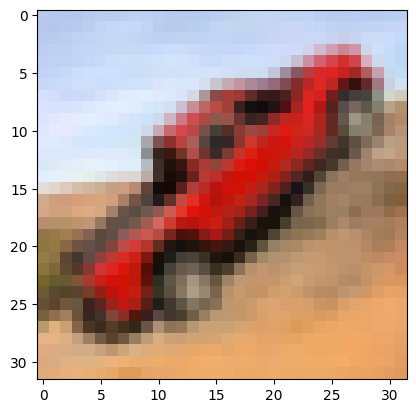

In [54]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colormaps

plt.imshow(trainset.data[140])
plt.show()

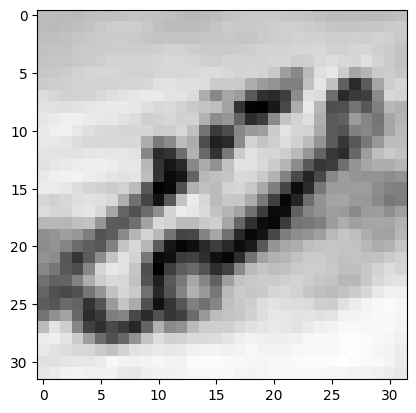

In [55]:
plt.imshow(trainset.data[140, :, : , 0], cmap=colormaps['gray']) # rosso
plt.show()

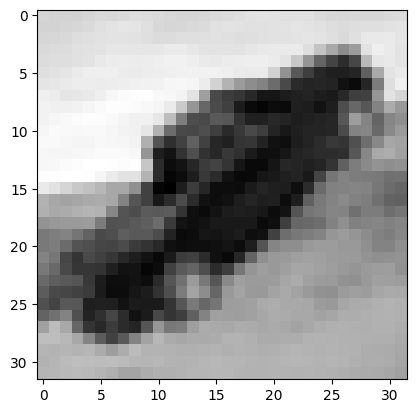

In [56]:
plt.imshow(trainset.data[140, :, : , 1], cmap=colormaps['gray']) # verde
plt.show()

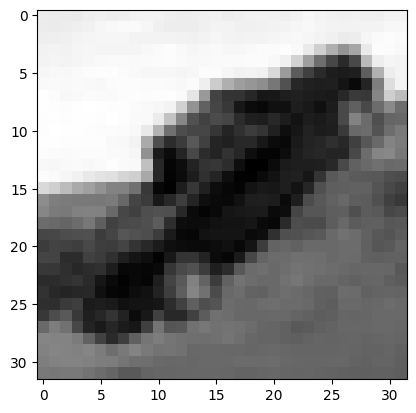

In [57]:
plt.imshow(trainset.data[140, :, : , 2], cmap=colormaps['gray']) # blue
plt.show()

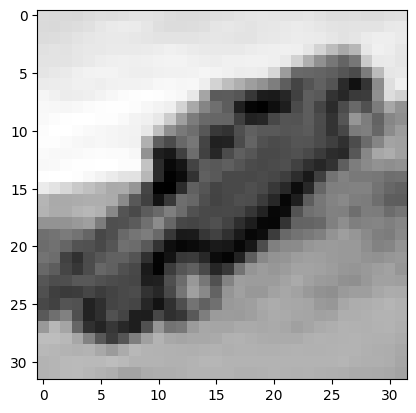

In [58]:
plt.imshow(trainset.data[140].mean(axis=2), cmap=colormaps['gray']) # monocromatica
plt.show()

## Slicing su tensori

In [59]:
x = torch.rand(3, 4, 2)
print(x)

y = x[0:2] # viene ritornata una vista invece che delle copie
y *= 10

print(y)

tensor([[[0.3497, 0.3983],
         [0.7379, 0.0846],
         [0.4245, 0.9778],
         [0.6800, 0.3151]],

        [[0.3911, 0.8943],
         [0.6889, 0.8389],
         [0.1780, 0.6442],
         [0.5894, 0.5872]],

        [[0.9643, 0.7768],
         [0.8447, 0.7195],
         [0.7101, 0.4130],
         [0.0587, 0.0776]]])
tensor([[[3.4973, 3.9828],
         [7.3793, 0.8462],
         [4.2447, 9.7781],
         [6.7995, 3.1512]],

        [[3.9109, 8.9431],
         [6.8890, 8.3894],
         [1.7802, 6.4415],
         [5.8938, 5.8716]]])


## Element Wise operations on tensors

> Funzioni scalari che ricevono come argomento tensori e vengono applicati a ciascuno degli elementi del tensore


In [60]:
x = torch.tensor([0.5, 2, 4])
sqrt_x = torch.sqrt(x)
print(sqrt_x)

y = torch.tensor([1., 1. , 1.])
z = sqrt_x + y  # somma

print(z)

w = torch.tensor([10, 100, 1000])
wz = w * z  # prodotto elemento per elemento
print(wz)

zw = z * w
print(zw)





tensor([0.7071, 1.4142, 2.0000])
tensor([1.7071, 2.4142, 3.0000])
tensor([  17.0711,  241.4214, 3000.0000])
tensor([  17.0711,  241.4214, 3000.0000])


## Reshaping tensors

Trasformazione della forma di un tensore.

In [61]:
x = torch.linspace(0, 23, 24) # start, end, steps
print(x)

x = x.reshape((4, 6)) # tensore 2D conf forma 4, 6
print(x)

x = x.reshape((2, 3, 4)) # tensore 3D conf forma 2, 3, 4
print(x)


tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23.])
tensor([[ 0.,  1.,  2.,  3.,  4.,  5.],
        [ 6.,  7.,  8.,  9., 10., 11.],
        [12., 13., 14., 15., 16., 17.],
        [18., 19., 20., 21., 22., 23.]])
tensor([[[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]],

        [[12., 13., 14., 15.],
         [16., 17., 18., 19.],
         [20., 21., 22., 23.]]])


## Broadcasting

Permette di effettuare operazioni element wised su tensori non conformi, ovvero tensori con forme diverse.



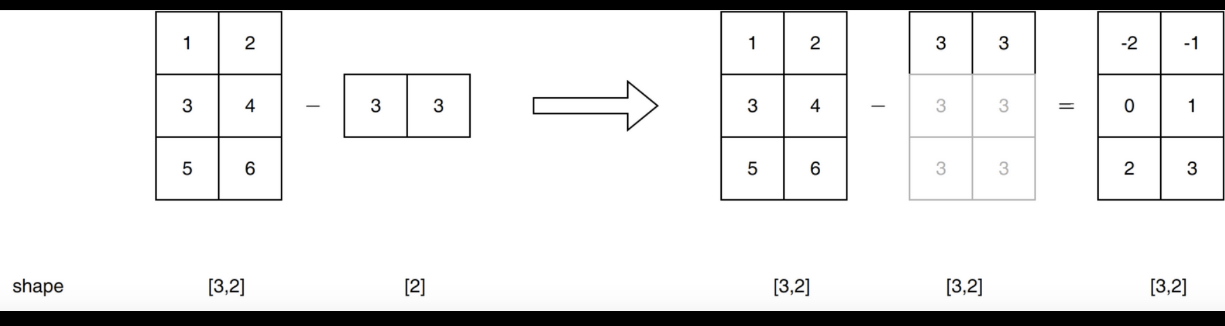

- Aggiungiamo un nuovo asse al secondo tensore facendo diventare di forma (1, 2).
- Replichimao per 3 volte il primo asse e otteniamo la forma (3,2)
- Facciamo la difference element wised


In [62]:
x = torch.tensor([[1, 2], [3, 4,], [5, 6]])
y = torch.tensor([3, 3])

print(x.shape)
print(y.shape)

z = x - y # viene fatto il broadcasting in automatico

print(z)
print(z.shape)

w = y - x

print(w)
print(w.shape)

torch.Size([3, 2])
torch.Size([2])
tensor([[-2, -1],
        [ 0,  1],
        [ 2,  3]])
torch.Size([3, 2])
tensor([[ 2,  1],
        [ 0, -1],
        [-2, -3]])
torch.Size([3, 2])


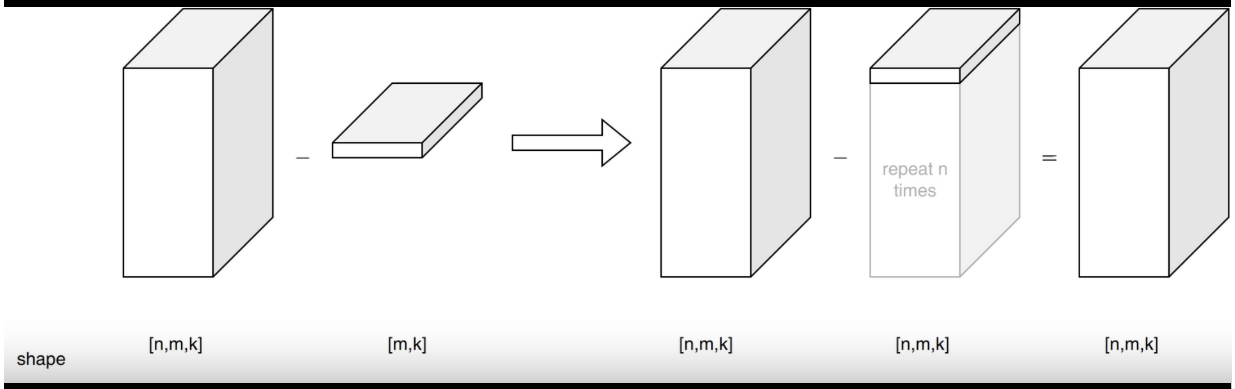


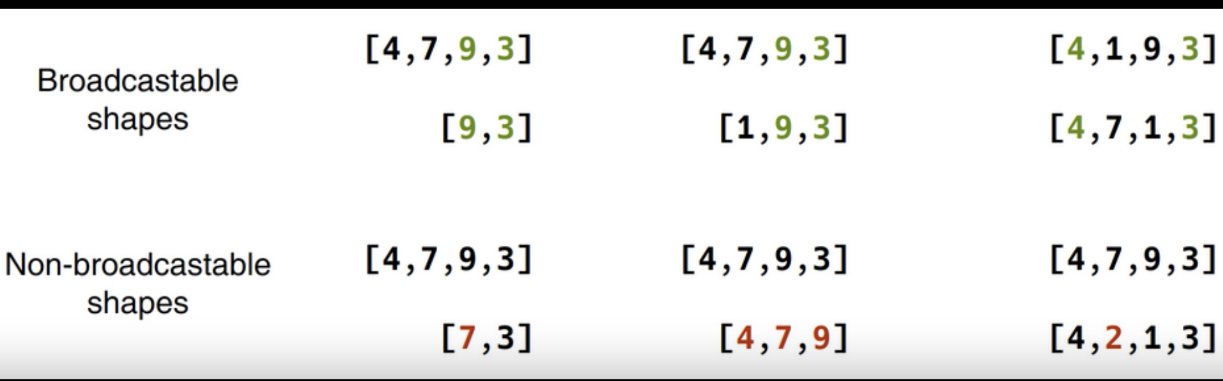


> È possibile fare brodcasting tra due tensori se le loro forme soddisfano una di queste confizioni, guardando da dx verso sx (esempio verde):

- Le dimensioni sono identiche
- se una delle due dimensioni è 1

# Video Lecture 2

In [63]:
# @title Get Adult Data

import pandas as pd
import numpy as np
import os

if not os.path.exists('adult.csv'):
    !wget https://raw.githubusercontent.com/AlessioChen/Deeep_learning_class/main/video_lecture_02/adult.csv

def get_adult(filename, train_size=0.8):
    df = pd.read_csv(filename)
    # Remove rows with missing values
    df = df.dropna()
    # Shuffle rows
    df = df.sample(frac=1, replace=False, random_state=1234)

    c_attrs = ['workclass','education','marital-status',
               'occupation','relationship','race','sex',
               'native-country']
    n_attrs = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']
    num_train = int(train_size*len(df))
    num_val = len(df)-num_train

    epsilon = 1e-7

    # Just for clarity, standardize each numerical attribute separately,
    # inside the dataframe
    for attr in n_attrs:
        mu = df.head(num_train)[attr].mean()
        sigma = df.head(num_train)[attr].std()
        df[attr]=(df[attr]-mu)/(np.sqrt(sigma*sigma + epsilon))
        # dfmin=df.head(num_train)[attr].min()
        # dfmax=df.head(num_train)[attr].max()
        # df[attr]=(df[attr]-dfmin)/(dfmax-dfmin)

    # Categorical attributes (aka multilevel variables in the statistics
    # jargon) should be one-hot encoded (so the subvectors are already in
    # [0,1]). We use pandas to create the encoding
    df = pd.get_dummies(df,columns=c_attrs, prefix=[c[:2] for c in c_attrs])

    y_train = df.head(num_train)['salary'].values=='<=50K'
    y_val = df.tail(num_val)['salary'].values=='<=50K'
    y_train = y_train.astype(np.float32)
    y_val = y_val.astype(np.float32)
    del df['salary']  # this is the target!!

    # Take care of the # of bits for floating point. This affects
    # *significantly* memory and FlOps in the GPU.
    X_train=df.head(num_train).values.astype(np.float32)
    X_val=df.tail(num_val).values.astype(np.float32)
    return X_train, y_train, X_val, y_val

## Part1: Logistic regression in pure Tensorflow

> Implementazione della regressione logistica in tensor flow. (Modalità eager)

Problema delle classificazione binaria.  

$$
\min_{w} \sum_{(x,y) \in D} l(y, h(x;w))
$$


*  Y dato X è distribuito come una bernoulli con un parametro che dipende da X.
*  Si usa la funzione logistica $\sigma(a)$ come risposta

$$
\sigma(a) = \frac{1}{1 + e^{-a}}
$$

- Si usa la cross entropy come loss


$$
l(y,h(x;w)) = y \ln h( x;w) + (1-y) \ln (1-h(x;w))
$$


$$
h(x;w) = \sigma(w^Tx)
$$

- Per l'ottimizzazione useremo il metodo del gradiente stocastico (SGD) con momentum



In [64]:
import tensorflow as tf
import random
import numpy as np

# @title Logistic regression class
class LogisticRegression():
  def __init__(self,
                d,             # Dimension of the input vector
                lr,            # Learning rate
                momentum,      # Momentum
                nesterov,      # NAG (if True) or classic momentus (False)
                batch_size,    # Batch size
                num_epochs,    # Number of cycles through the whole trainig set
                seed,):        # !=0 to reproduce from run to run
      self.d = d
      self.lr = lr
      self.momentum = momentum
      self.nesterov = nesterov
      self.batch_size = batch_size
      self.num_epochs = num_epochs
      self.seed = seed

      # Lock the seed for reproducibility
      tf.random.set_seed(seed)
      # Declare parameters as tensorflow variables
      self.w = tf.Variable(tf.random.normal(shape=[d, 1]), name='w')
      self.b = tf.Variable(tf.random.normal(shape=[1, 1]), name='b')

      self.optimizer = tf.optimizers.SGD(
          learning_rate= lr,
          momentum= momentum,
          nesterov= nesterov
      )


  def _compute_logits(self, X):
    # Xw^T + b
    return tf.matmul(X, self.w) + self.b  # Prodotto matriciale tra la matrice dei dati e vettore dei parametri

  def _step(self, X, y):
    # tape = context manager
    with tf.GradientTape() as tape:
      logits = self._compute_logits(X)
      loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=logits)
      loss = tf.reduce_mean(loss) # media su tutti gli elementi del mini batch

    gradients = tape.gradient(loss, [self.w, self.b])
    self.optimizer.apply_gradients(zip(gradients, [self.w, self.b]))
    prediction = tf.round(tf.sigmoid(logits)) # arrotondamento < 0.5 = 0, >= 0.5 = 1
    correct = tf.cast(tf.equal(prediction, y), dtype=tf.float32) # da boolean a float
    accuracy = tf.reduce_mean(correct) # accuratezza = media del vettore

    return loss,accuracy

  def _metrics(self, X, y):
    f = self._compute_logits(X)
    loss = tf.nn.sigmoid_cross_entropy_with_logits(logits=f, labels=y)
    loss = tf.reduce_mean(loss)
    prediction = tf.round(tf.sigmoid(f))
    correct = tf.cast(tf.equal(prediction, y), dtype=tf.float32)
    accuracy = tf.reduce_mean(correct)

    return loss,accuracy


  def fit(self, X_train, y_train, X_test, y_test):
    n, d = X_train.shape
    assert d == self.d
    random.seed(self.seed)

    # Servono per salvare l'andamento del training (loss e accuracy)
    train_summary_writer = tf.summary.create_file_writer('tensorboard/log_regr/train')
    test_summary_writer = tf.summary.create_file_writer('tensorboard/log_regr/test')

    # ciclo esterno sulle epoche
    for epoch in range(self.num_epochs):
      idx = list(range(n))
      random.shuffle(idx)
      losses, accss = [], []
      num_batches = n // self.batch_size
      # cliclo interno sui mini batch
      for b in range(num_batches):
        mb_idx = np.array(idx[b*self.batch_size:(b+1)*self.batch_size]) # sotto-insieme contigui dei dati
        X_mb = X_train[mb_idx]
        y_mb = np.matrix(y_train[mb_idx]).T
        loss, accuracy = self._step(X_mb, y_mb)
        losses.append(loss)
        accss.append(accuracy)

      print(f"Epoch: {epoch+1:4d}", end=" ")
      print(f"Loss: {np.array(losses).mean():.5f}", end=" ")
      print(f"Accuracy: {np.mean(accss).mean():.2f}%")

      # Salva loss e accuracy calcolati con i pesi correnti
      with train_summary_writer.as_default():
        loss,acc = self._metrics(X_train,np.matrix(y_train).T)
        tf.summary.scalar('loss', loss, step=epoch)
        tf.summary.scalar('accuracy',acc, step=epoch)

      with test_summary_writer.as_default():
        loss,acc = self._metrics(X_test,np.matrix(y_test).T)
        tf.summary.scalar('loss', loss, step=epoch)
        tf.summary.scalar('accuracy',acc, step=epoch)



  def predict(self, X_np):
    n, d = X_np.shape
    assert d == self.d
    pred = self._compute_logits(X_np)
    return (pred >0).numpy().flatten()





In [65]:
# @title Logisistic regression with adult data

X_train, y_train, X_test, y_test = get_adult('adult.csv')
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

lr = 0.01
momentum = 0.95
nesterov = False
batch_size = 1024
num_epochs = 30
seed = 1234

clf = LogisticRegression(
    X_train.shape[1],
    lr,
    momentum,
    nesterov,
    batch_size,
    num_epochs,
    seed
)

clf.fit(X_train, y_train, X_test, y_test)
pred = clf.predict(X_test)
print(f"Test set accuracy: {np.mean(pred == y_test) * 100:.2f}%")

(36177, 104) (36177,) (9045, 104) (9045,)
Epoch:    1 Loss: 0.91138 Accuracy: 0.63%
Epoch:    2 Loss: 0.49737 Accuracy: 0.78%
Epoch:    3 Loss: 0.44679 Accuracy: 0.81%
Epoch:    4 Loss: 0.43260 Accuracy: 0.81%
Epoch:    5 Loss: 0.41908 Accuracy: 0.81%
Epoch:    6 Loss: 0.40935 Accuracy: 0.82%
Epoch:    7 Loss: 0.40047 Accuracy: 0.82%
Epoch:    8 Loss: 0.39223 Accuracy: 0.82%
Epoch:    9 Loss: 0.38663 Accuracy: 0.82%
Epoch:   10 Loss: 0.38094 Accuracy: 0.83%
Epoch:   11 Loss: 0.37505 Accuracy: 0.83%
Epoch:   12 Loss: 0.37152 Accuracy: 0.83%
Epoch:   13 Loss: 0.36769 Accuracy: 0.83%
Epoch:   14 Loss: 0.36421 Accuracy: 0.83%
Epoch:   15 Loss: 0.36136 Accuracy: 0.83%
Epoch:   16 Loss: 0.35958 Accuracy: 0.83%
Epoch:   17 Loss: 0.35676 Accuracy: 0.84%
Epoch:   18 Loss: 0.35473 Accuracy: 0.84%
Epoch:   19 Loss: 0.35246 Accuracy: 0.84%
Epoch:   20 Loss: 0.35139 Accuracy: 0.84%
Epoch:   21 Loss: 0.34910 Accuracy: 0.84%
Epoch:   22 Loss: 0.34832 Accuracy: 0.84%
Epoch:   23 Loss: 0.34700 Accuracy

# Part2: Logistic regression in Pytorch


In [66]:
import torch
import random
import numpy as np

# @title Logistic regression class
class LogisticRegressionTorch():
  def __init__(self,
                d,             # Dimension of the input vector
                lr,            # Learning rate
                momentum,      # Momentum
                nesterov,      # NAG (if True) or classic momentus (False)
                batch_size,    # Batch size
                num_epochs,    # Number of cycles through the whole trainig set
                seed,          # !=0 to reproduce from run to run
                device):
      self.d = d
      self.lr = lr
      self.momentum = momentum
      self.nesterov = nesterov
      self.batch_size = batch_size
      self.num_epochs = num_epochs
      self.seed = seed

      torch.random.manual_seed(seed)
       # NOTE: REVIEW: in pytorch we may need to specify a device
      self.w = torch.randn(d, 1).to(device)
      self.b = torch.randn(1, 1).to(device)
      self.w.requires_grad = True
      self.b.requires_grad = True
      self.optimizer = torch.optim.SGD(
          params=[self.w, self.b],
          lr = lr,
          momentum = momentum,
          nesterov = nesterov
      )
      # NOTE: REVIEW: Create a criterion object
      self.criterion = torch.nn.BCEWithLogitsLoss(reduction='mean')


  def _compute_logits(self, X):
    # Xw^T + b
    return torch.matmul(X, self.w) + self.b  # Prodotto matriciale tra la matrice dei dati e vettore dei parametri

  def _step(self, X, y):

    logits = self._compute_logits(X)
    loss = self.criterion(logits, y)
    loss.backward()
    self.optimizer.step()
    self.optimizer.zero_grad() # NOTE: very important!

    prediction = torch.round(torch.nn.Sigmoid()(logits))
    correct = torch.eq(prediction, y).float()
    accuracy = torch.mean(correct)

    return loss,accuracy


  def fit(self, X_train, y_train, X_test, y_test):
    n, d = X_train.shape
    assert d == self.d
    random.seed(self.seed)

    # ciclo esterno sulle epoche
    for epoch in range(self.num_epochs):
      idx = list(range(n))
      random.shuffle(idx)
      losses, accss = [], []
      num_batches = n // self.batch_size
      # cliclo interno sui mini batch
      for b in range(num_batches):
        mb_idx = np.array(idx[b*self.batch_size:(b+1)*self.batch_size]) # sotto-insieme contigui dei dati
        X_mb = X_train[mb_idx]
        y_mb = y_train[mb_idx]
        loss, accuracy = self._step(X_mb, y_mb)

        # NOTE: data must be brough back to main RAM
        losses.append(loss.detach().numpy())
        accss.append(accuracy.detach().numpy())

      print(f"Epoch: {epoch+1:4d}", end=" ")
      print(f"Loss: {np.array(losses).mean():.5f}", end=" ")
      print(f"Accuracy: {np.mean(accss).mean():.2f}%")


  def predict(self, X):
    n, d = X.shape
    assert d == self.d
    pred = self._compute_logits(X)
    return pred


In [67]:
# @title Logisistic regression with adult data

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

X_train, y_train, X_test, y_test = get_adult('adult.csv')
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


y_train = np.matrix(y_train).T
y_test = np.matrix(y_test).T
X_train = torch.tensor(X_train).to(device)
y_train = torch.tensor(y_train).to(device)
X_test = torch.tensor(X_test).to(device)
y_test = torch.tensor(y_test).to(device)

lr = 0.1
momentum = 0.95
nesterov = False
batch_size = 1024
num_epochs = 30
seed = 1234

clf = LogisticRegressionTorch(
    X_train.shape[1],
    lr,
    momentum,
    nesterov,
    batch_size,
    num_epochs,
    seed,
    device
)

clf.fit(X_train, y_train, X_test, y_test)
pred = clf.predict(X_test)
acc = ((pred>0)==y_test).cpu().numpy().astype(np.float32).mean()
print(f"Test set accuracy: {acc * 100:.2f}%")

(36177, 104) (36177,) (9045, 104) (9045,)
Epoch:    1 Loss: 0.92210 Accuracy: 0.71%
Epoch:    2 Loss: 0.51471 Accuracy: 0.82%
Epoch:    3 Loss: 0.37846 Accuracy: 0.83%
Epoch:    4 Loss: 0.35176 Accuracy: 0.84%
Epoch:    5 Loss: 0.33984 Accuracy: 0.84%
Epoch:    6 Loss: 0.33568 Accuracy: 0.84%
Epoch:    7 Loss: 0.33279 Accuracy: 0.85%
Epoch:    8 Loss: 0.33077 Accuracy: 0.85%
Epoch:    9 Loss: 0.33043 Accuracy: 0.85%
Epoch:   10 Loss: 0.32963 Accuracy: 0.85%
Epoch:   11 Loss: 0.32881 Accuracy: 0.85%
Epoch:   12 Loss: 0.32879 Accuracy: 0.85%
Epoch:   13 Loss: 0.32839 Accuracy: 0.85%
Epoch:   14 Loss: 0.32858 Accuracy: 0.85%
Epoch:   15 Loss: 0.32753 Accuracy: 0.85%
Epoch:   16 Loss: 0.32814 Accuracy: 0.85%
Epoch:   17 Loss: 0.32753 Accuracy: 0.85%
Epoch:   18 Loss: 0.32778 Accuracy: 0.85%
Epoch:   19 Loss: 0.32736 Accuracy: 0.85%
Epoch:   20 Loss: 0.32789 Accuracy: 0.85%
Epoch:   21 Loss: 0.32745 Accuracy: 0.85%
Epoch:   22 Loss: 0.32753 Accuracy: 0.85%
Epoch:   23 Loss: 0.32744 Accuracy